# K-Means CLustering 
Menggunakan 2 Cluster dan 3 Cluster

### Menggunakan 2 Cluster

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("C:/Dokumen/1. SAINS DATA/SEMESTER 4/Data Mining/Tugas/RTM 5/Student Stress Factors (2).csv")
data.head(3)

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4


In [3]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1
data.describe()

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,6.312500,3.956731,6.817308,5.375000,5.206731,5.687500
std,2.747558,3.118648,2.652895,3.430953,3.676863,3.394563
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.500000,1.000000,6.000000,3.500000,1.000000,3.500000
50%,6.000000,3.500000,6.000000,4.750000,6.000000,6.000000
75%,8.500000,6.000000,8.500000,8.500000,8.500000,8.500000
max,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000


In [4]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [5]:
centroids = random_centroids(data, 2)
centroids

C:\Users\hp\AppData\Local\Temp\ipykernel_18640\1845334667.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


,0,1
Kindly Rate your Sleep Quality 😴,11.0,6.0
How many times a week do you suffer headaches 🤕?,1.0,1.0
How would you rate you academic performance 👩‍🎓?,8.5,6.0
how would you rate your study load?,11.0,1.0
How many times a week you practice extracurricular activities 🎾?,3.5,6.0
How would you rate your stress levels?,3.5,8.5


In [6]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

labels = get_labels(data, centroids)
labels.value_counts()

1    335
0    185
Name: count, dtype: int64

In [7]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    
    # Memisahkan data berdasarkan label
    data_C1 = data_2d[labels == 0]
    data_C2 = data_2d[labels == 1]
    
    # Memplot data kuning dan hitam
    plt.scatter(x=data_C1[:,0], y=data_C1[:,1], c='yellow', label='Tidak Stress')
    plt.scatter(x=data_C2[:,0], y=data_C2[:,1], c='black', label='Stress')
    
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1], marker='*', s=200, c='red', label='Centroids')
    plt.legend()
    plt.show()

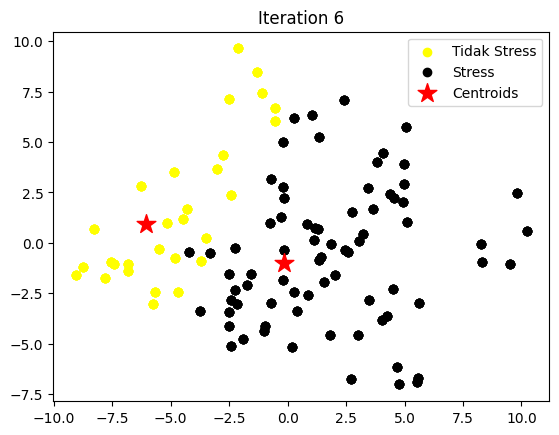

In [9]:
max_iterations = 50
centroid_count = 2

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [10]:
centroids

,0,1
Kindly Rate your Sleep Quality 😴,4.153667,6.159291
How many times a week do you suffer headaches 🤕?,3.643698,2.453712
How would you rate you academic performance 👩‍🎓?,5.193651,6.397134
how would you rate your study load?,1.679313,5.611724
How many times a week you practice extracurricular activities 🎾?,2.907671,3.975367
How would you rate your stress levels?,1.900191,5.941964


In [11]:
labels.value_counts()

1    375
0    145
Name: count, dtype: int64

In [37]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    
    data_C1 = data_2d[labels == 0]
    data_C2 = data_2d[labels == 1]
    
    # Memplot data kuning dan hitam
    plt.scatter(x=data_C1[:,0], y=data_C1[:,1], c='yellow', label='Tidak Stress')
    plt.scatter(x=data_C2[:,0], y=data_C2[:,1], c='black', label='Stress')
    
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1], marker='*', s=200, c='red', label='Centroids')
    plt.legend()
    plt.show()

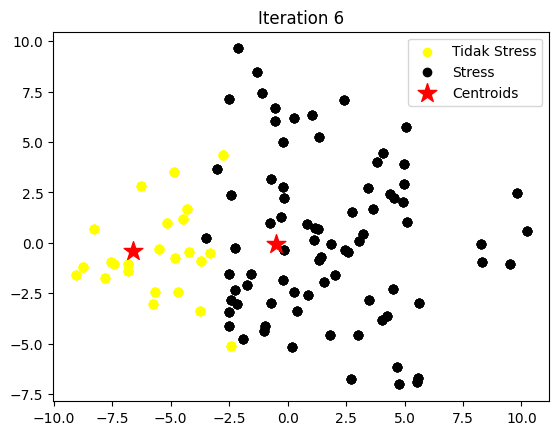

In [39]:
max_iterations = 50
centroid_count = 2

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [40]:
centroids

,0,1
Kindly Rate your Sleep Quality 😴,5.159298,5.631049
How many times a week do you suffer headaches 🤕?,4.138326,2.420869
How would you rate you academic performance 👩‍🎓?,4.074384,6.791280
how would you rate your study load?,1.985381,4.949198
How many times a week you practice extracurricular activities 🎾?,1.736156,4.550664
How would you rate your stress levels?,1.857255,5.571369


In [41]:
labels.value_counts()

1    400
0    120
Name: count, dtype: int64

In [42]:
data[labels == 0]

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
5,6.0,1.0,6.0,3.5,1.0,1.0
7,8.5,6.0,1.0,8.5,1.0,1.0
17,1.0,1.0,1.0,1.0,1.0,3.5
20,6.0,8.5,3.5,3.5,1.0,3.5
24,11.0,1.0,8.5,3.5,1.0,1.0
...,...,...,...,...,...,...
503,8.5,8.5,3.5,6.0,1.0,6.0
505,1.0,6.0,3.5,3.5,1.0,1.0
509,8.5,1.0,8.5,1.0,1.0,3.5
510,11.0,11.0,6.0,1.0,1.0,1.0


In [43]:
data[labels == 1]

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,6.0,1.0,6.0,8.5,3.5,6.0
1,8.5,1.0,3.5,6.0,6.0,3.5
2,3.5,1.0,3.5,1.0,8.5,8.5
3,6.0,3.5,6.0,3.5,6.0,6.0
4,3.5,6.0,1.0,11.0,11.0,6.0
...,...,...,...,...,...,...
514,6.0,3.5,6.0,11.0,8.5,6.0
515,6.0,3.5,8.5,3.5,6.0,1.0
517,3.5,6.0,11.0,1.0,11.0,3.5
518,6.0,8.5,6.0,11.0,3.5,11.0


Terlihat dari data cluster yang telah divisualisasikan, dari perhitungan iterasi terhenti pada iterasi 9 dan terlihat maka banyak mahasiswa yang merasa stress dengan kehidupan kampus mereka. Hasil iterasi yang telah dilakukan mendapati selalu lebih banyak Cluster 2 atau Stress dibandingkan Cluster 1 yang tidak stress.

### Menggunakan 3 Cluster

In [56]:
data = pd.read_csv("C:/Dokumen/1. SAINS DATA/SEMESTER 4/Data Mining/Tugas/RTM 5/Student Stress Factors (2).csv")
data.head(3)

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4


In [57]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1
data.describe()

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,6.312500,3.956731,6.817308,5.375000,5.206731,5.687500
std,2.747558,3.118648,2.652895,3.430953,3.676863,3.394563
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.500000,1.000000,6.000000,3.500000,1.000000,3.500000
50%,6.000000,3.500000,6.000000,4.750000,6.000000,6.000000
75%,8.500000,6.000000,8.500000,8.500000,8.500000,8.500000
max,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000


In [58]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [59]:
centroids = random_centroids(data, 3)
centroids

C:\Users\hp\AppData\Local\Temp\ipykernel_18380\1845334667.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


,0,1,2
Kindly Rate your Sleep Quality 😴,3.5,3.5,11.0
How many times a week do you suffer headaches 🤕?,1.0,6.0,8.5
How would you rate you academic performance 👩‍🎓?,8.5,8.5,6.0
how would you rate your study load?,3.5,8.5,8.5
How many times a week you practice extracurricular activities 🎾?,3.5,1.0,8.5
How would you rate your stress levels?,11.0,8.5,1.0


In [60]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

labels = get_labels(data, centroids)
labels.value_counts()

0    205
1    160
2    155
Name: count, dtype: int64

In [61]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

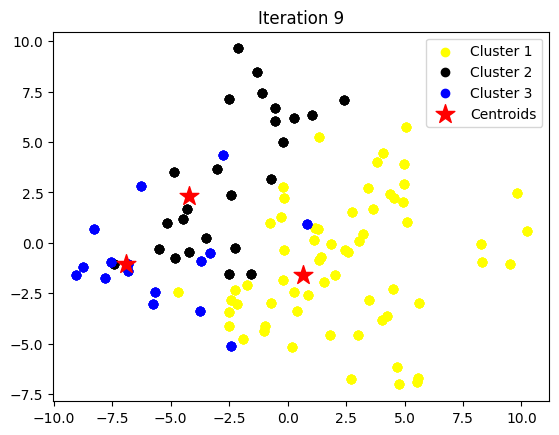

In [62]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    
    # Memisahkan data berdasarkan label
    data_C1 = data_2d[labels == 0]
    data_C2 = data_2d[labels == 1]
    data_C3 = data_2d[labels == 2]
    
    # Memplot data
    plt.scatter(x=data_C1[:,0], y=data_C1[:,1], c='yellow', label='Cluster 1')
    plt.scatter(x=data_C2[:,0], y=data_C2[:,1], c='black', label='Cluster 2')
    plt.scatter(x=data_C3[:,0], y=data_C3[:,1], c='blue', label='Cluster 3')
    
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1], marker='*', s=200, c='red', label='Centroids')
    plt.legend()
    plt.show()

max_iterations = 50
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [63]:
centroids

,0,1,2
Kindly Rate your Sleep Quality 😴,6.084994,4.164124,5.831799
How many times a week do you suffer headaches 🤕?,2.497557,1.748562,7.955857
How would you rate you academic performance 👩‍🎓?,6.493594,6.510892,4.021405
how would you rate your study load?,5.428642,2.609065,2.375941
How many times a week you practice extracurricular activities 🎾?,4.047868,4.374385,1.808716
How would you rate your stress levels?,7.553796,1.960102,1.654458


In [64]:
labels.value_counts()

0    315
1    125
2     80
Name: count, dtype: int64

In [65]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

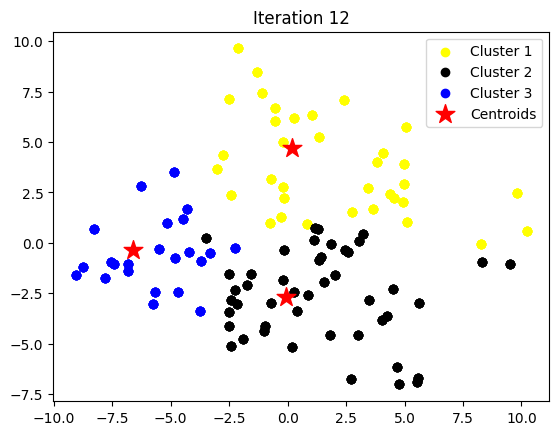

In [66]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    
    # Memisahkan data berdasarkan label
    data_C1 = data_2d[labels == 0]
    data_C2 = data_2d[labels == 1]
    data_C3 = data_2d[labels == 2]
    
    # Memplot data
    plt.scatter(x=data_C1[:,0], y=data_C1[:,1], c='yellow', label='Cluster 1')
    plt.scatter(x=data_C2[:,0], y=data_C2[:,1], c='black', label='Cluster 2')
    plt.scatter(x=data_C3[:,0], y=data_C3[:,1], c='blue', label='Cluster 3')
    
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1], marker='*', s=200, c='red', label='Centroids')
    plt.legend()
    plt.show()

max_iterations = 50
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [67]:
centroids

,0,1,2
Kindly Rate your Sleep Quality 😴,5.623361,5.798366,4.857456
How many times a week do you suffer headaches 🤕?,2.628232,2.429897,3.710231
How would you rate you academic performance 👩‍🎓?,7.026905,6.522634,4.101392
how would you rate your study load?,4.275833,5.490221,1.937039
How many times a week you practice extracurricular activities 🎾?,9.119083,2.645193,1.711005
How would you rate your stress levels?,3.647839,7.495112,1.863734


In [68]:
labels.value_counts()

1    230
0    175
2    115
Name: count, dtype: int64

In [69]:
data[labels == 0]

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
1,8.5,1.0,3.5,6.0,6.0,3.5
2,3.5,1.0,3.5,1.0,8.5,8.5
3,6.0,3.5,6.0,3.5,6.0,6.0
4,3.5,6.0,1.0,11.0,11.0,6.0
8,3.5,1.0,8.5,8.5,11.0,1.0
...,...,...,...,...,...,...
502,3.5,6.0,6.0,3.5,11.0,3.5
514,6.0,3.5,6.0,11.0,8.5,6.0
515,6.0,3.5,8.5,3.5,6.0,1.0
517,3.5,6.0,11.0,1.0,11.0,3.5


In [70]:
data[labels == 1]

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,6.0,1.0,6.0,8.5,3.5,6.0
6,6.0,11.0,1.0,8.5,6.0,11.0
10,3.5,6.0,11.0,11.0,3.5,8.5
13,8.5,1.0,8.5,8.5,1.0,1.0
15,3.5,6.0,6.0,11.0,6.0,8.5
...,...,...,...,...,...,...
508,6.0,1.0,8.5,3.5,1.0,6.0
511,6.0,1.0,8.5,8.5,6.0,6.0
512,8.5,6.0,8.5,8.5,6.0,11.0
513,6.0,3.5,8.5,3.5,6.0,8.5


In [71]:
data[labels == 2]

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
5,6.0,1.0,6.0,3.5,1.0,1.0
7,8.5,6.0,1.0,8.5,1.0,1.0
17,1.0,1.0,1.0,1.0,1.0,3.5
20,6.0,8.5,3.5,3.5,1.0,3.5
22,3.5,1.0,3.5,6.0,3.5,3.5
...,...,...,...,...,...,...
499,6.0,6.0,1.0,1.0,1.0,1.0
505,1.0,6.0,3.5,3.5,1.0,1.0
509,8.5,1.0,8.5,1.0,1.0,3.5
510,11.0,11.0,6.0,1.0,1.0,1.0
